## Deep Learning Spring 2025: CIFAR 10 classification - Experimented Model
#### Pooja Gayathri Kanala - pk2921<br> Srushti Shah - ss17021<br> Subhiksha Seshadri Nallore - ssn9077

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split, TensorDataset
from torch.optim.lr_scheduler import StepLR, MultiStepLR
from PIL import Image
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

# Load and process CIFAR-10 dataset
def cifar_batch_loader(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

cifar10_dir = 'cifar-10-batches-py'
meta = cifar_batch_loader(os.path.join(cifar10_dir, 'batches.meta'))
label_names = [label.decode('utf-8') for label in meta[b'label_names']]

# Enhanced dataset class with built-in preprocessing
class EnhancedCIFAR10Dataset(torch.utils.data.Dataset):
    def __init__(self, data_batches=None, transform=None, test=False):
        self.transform = transform
        
        if test:
            # Load test data
            batch = cifar_batch_loader(os.path.join(cifar10_dir, 'test_batch'))
            self.images = batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            self.labels = np.array(batch[b'labels'])
        elif data_batches:
            # Use provided data
            self.images = data_batches[0]
            self.labels = data_batches[1]
        else:
            # Load training data
            data, labels = [], []
            for i in range(1, 6):
                batch = cifar_batch_loader(os.path.join(cifar10_dir, f'data_batch_{i}'))
                data.append(batch[b'data'])
                labels.extend(batch[b'labels'])
            
            self.images = np.vstack(data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            self.labels = np.array(labels)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

# Create datasets
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAdjustSharpness(2, 0.2),
    transforms.RandomCrop(32, 4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=1.0)
])

test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

# Create datasets with simplified calls
train_full = EnhancedCIFAR10Dataset(transform=train_transform)
test_dataset = EnhancedCIFAR10Dataset(test=True, transform=test_transform)

# Split training and validation
train_size = int(0.9 * len(train_full))
val_size = len(train_full) - train_size
train_dataset, val_dataset = random_split(train_full, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=4)

Using device: cuda


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
       BatchNorm2d-5           [-1, 32, 32, 32]              64
           Dropout-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]           9,216
       BatchNorm2d-8           [-1, 32, 32, 32]              64
        BasicBlock-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 32, 32, 32]           9,216
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           9,216
      BatchNorm2d-14           [-1, 32,

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100] - Train Loss: 2.0421, Train Acc: 26.09% - Validation Loss: 1.7727, Val Acc: 34.14%
Epoch [2/100] - Train Loss: 1.6124, Train Acc: 40.58% - Validation Loss: 1.5732, Val Acc: 42.84%
Epoch [3/100] - Train Loss: 1.4407, Train Acc: 47.47% - Validation Loss: 1.4709, Val Acc: 46.50%
Epoch [4/100] - Train Loss: 1.2919, Train Acc: 53.48% - Validation Loss: 1.2293, Val Acc: 55.48%
Epoch [5/100] - Train Loss: 1.1531, Train Acc: 58.62% - Validation Loss: 1.1791, Val Acc: 58.78%
Epoch [6/100] - Train Loss: 1.0443, Train Acc: 63.30% - Validation Loss: 1.1609, Val Acc: 59.76%
Epoch [7/100] - Train Loss: 0.9506, Train Acc: 66.72% - Validation Loss: 1.1180, Val Acc: 60.68%
Epoch [8/100] - Train Loss: 0.8859, Train Acc: 68.93% - Validation Loss: 1.0057, Val Acc: 64.08%
Epoch [9/100] - Train Loss: 0.8448, Train Acc: 70.54% - Validation Loss: 0.8352, Val Acc: 70.76%
Epoch [10/100] - Train Loss: 0.8147, Train Acc: 71.61% - Validation Loss: 0.8853, Val Acc: 69.12%
Epoch [11/100] - Train Loss: 

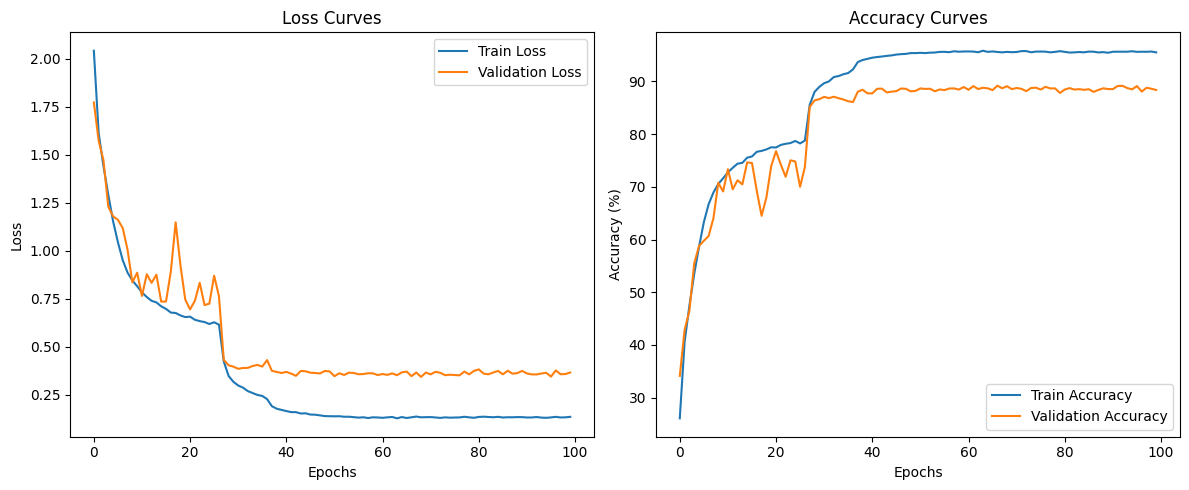

In [ ]:
# Define ResNet model for CIFAR-10
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(dropout_rate)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.shortcut(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

# Optimized ResNet variant for CIFAR-10
class ResNetCIFAR(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.1):
        super(ResNetCIFAR, self).__init__()
        self.in_channels = 32
        
        # Modified initial layers for 32x32 images
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        
        # ResNet layers - reduced number of blocks to control parameter count
        self.layer1 = self._make_layer(32, 3, stride=1, dropout_rate=dropout_rate)
        self.layer2 = self._make_layer(64, 4, stride=2, dropout_rate=dropout_rate)
        self.layer3 = self._make_layer(128, 3, stride=2, dropout_rate=dropout_rate)
        self.layer4 = self._make_layer(256, 3, stride=2, dropout_rate=dropout_rate)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(256, num_classes)
        
        # Initialize weights
        self._initialize_weights()

    def _make_layer(self, out_channels, blocks, stride, dropout_rate):
        layers = [BasicBlock(self.in_channels, out_channels, stride, dropout_rate)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels, stride=1, dropout_rate=dropout_rate))
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        return self.fc(x)

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNetCIFAR(num_classes=10, dropout_rate=0.1).to(device)
summary(model, (3, 32, 32))  # Correct input size for CIFAR-10

# Loss function, optimizer and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=5, verbose=True)

# Training Loop
num_epochs = 100  # Increased epochs for better convergence
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_acc = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in training_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss /= len(training_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation Step
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    val_loss /= len(validation_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # Save best model
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_accuracy': val_accuracy,
        }, 'best_resnet_cifar10_model.pth')

    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% - Validation Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curves')
plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()


In [ ]:
# Test Evaluation
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 90.63%


In [ ]:
import pandas as pd
# Load test dataset
cifar_test_path = 'cifar_test_nolabel.pkl'
test_batch = load_cifar_batch(cifar_test_path)
test_images = test_batch[b'data'].astype(np.float32) / 255.0

composed_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Convert test dataset to Tensor
test_dataset = [(composed_test(img),) for img in test_images]
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        images = batch[0].to(device)  # Get images tensor from tuple and move to device
        outputs = model(images) 
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Generate submission file
submission = pd.DataFrame({'ID': np.arange(len(predictions)), 'Labels': predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file saved.")

Submission file saved.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

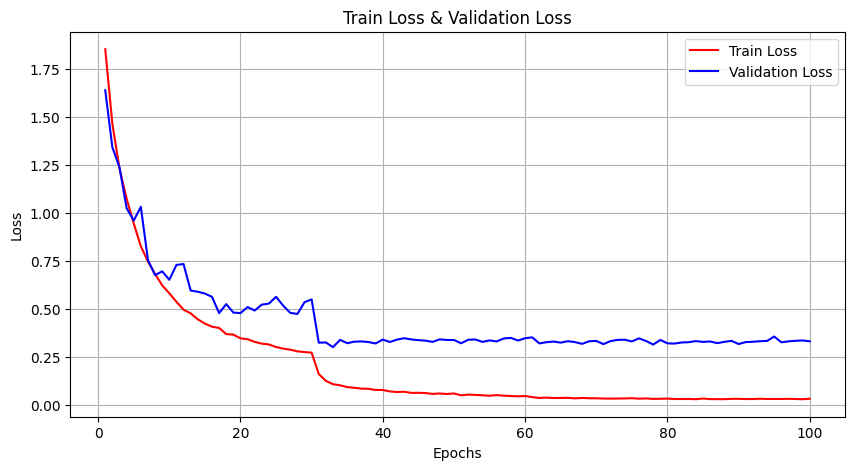

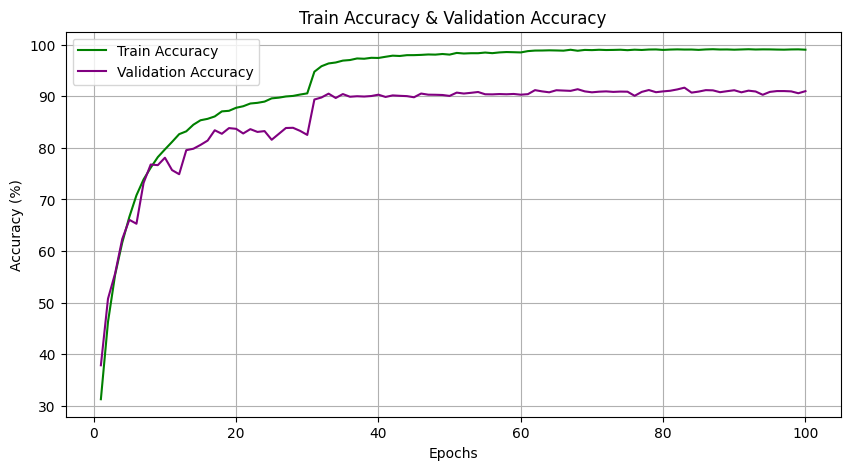

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.optim.lr_scheduler import MultiStepLR

# Define BasicBlock for ResNet variant
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.skip = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        identity = x 
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.skip(identity)
        out = self.relu(out)
        return out

# Optimized ResNet Model
class ResNet34(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet34, self).__init__()
        self.init_conv = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.init_bn = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(64, 64, 4, stride=1)
        self.layer2 = self._make_layer(64, 128, 4, stride=2)
        self.layer3 = self._make_layer(128, 256, 3, stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = [BasicBlock(in_channels, out_channels, stride)]
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.init_conv(x)
        out = self.init_bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet34(num_classes=10).to(device)
summary(model, (3, 32, 32))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)
scheduler = MultiStepLR(optimizer, milestones=[30, 60, 80, 90], gamma=0.1)

# Training Loop
num_epochs = 100
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in training_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss /= len(training_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation Step
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    val_loss /= len(validation_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% - Validation Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss & Validation Loss')
plt.legend()
plt.grid()
plt.savefig('loss_curves.png')
plt.show()

# Plot Accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train Accuracy & Validation Accuracy')
plt.legend()
plt.grid()
plt.savefig('accuracy_curves.png')
plt.show()

In [ ]:
# Test Evaluation
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 92.81%


In [ ]:
import pandas as pd
# Load test dataset
cifar_test_path = 'cifar_test_nolabel.pkl'
test_batch = load_cifar_batch(cifar_test_path)
test_images = test_batch[b'data'].astype(np.float32) / 255.0

composed_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Convert test dataset to Tensor
test_dataset = [(composed_test(img),) for img in test_images]
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        images = batch[0].to(device)  # Get images tensor from tuple and move to device
        outputs = model(images) 
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Generate submission file
submission = pd.DataFrame({'ID': np.arange(len(predictions)), 'Labels': predictions})
submission.to_csv('submission2.csv', index=False)
print("Submission2 file saved.")

Submission2 file saved.


In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split, TensorDataset
from torch.optim.lr_scheduler import StepLR, MultiStepLR
from PIL import Image
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

# Load and process CIFAR-10 dataset
def cifar_batch_loader(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

cifar10_dir = 'cifar-10-batches-py'
meta = cifar_batch_loader(os.path.join(cifar10_dir, 'batches.meta'))
label_names = [label.decode('utf-8') for label in meta[b'label_names']]

#normalization parameters
mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]

# Enhanced dataset class with built-in preprocessing
class EnhancedCIFAR10Dataset(torch.utils.data.Dataset):
    def __init__(self, data_batches=None, transform=None, test=False):
        self.transform = transform
        
        if test:
            # Load test data
            batch = cifar_batch_loader(os.path.join(cifar10_dir, 'test_batch'))
            self.images = batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            self.labels = np.array(batch[b'labels'])
        elif data_batches:
            # Use provided data
            self.images = data_batches[0]
            self.labels = data_batches[1]
        else:
            # Load training data
            data, labels = [], []
            for i in range(1, 6):
                batch = cifar_batch_loader(os.path.join(cifar10_dir, f'data_batch_{i}'))
                data.append(batch[b'data'])
                labels.extend(batch[b'labels'])
            
            self.images = np.vstack(data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            self.labels = np.array(labels)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

# Create datasets
train_transform = transforms.Compose([  
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(0.1),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomErasing(p=0.75, scale=(0.02, 0.1), value=1.0, inplace=False)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Create datasets with simplified calls
train_full = EnhancedCIFAR10Dataset(transform=train_transform)
test_dataset = EnhancedCIFAR10Dataset(test=True, transform=test_transform)

# Split training and validation
train_size = int(0.9 * len(train_full))
val_size = len(train_full) - train_size
train_dataset, val_dataset = random_split(train_full, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=4)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
     ResidualBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
    ResidualBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]           8,192
      BatchNorm2d-14          [-1, 128,

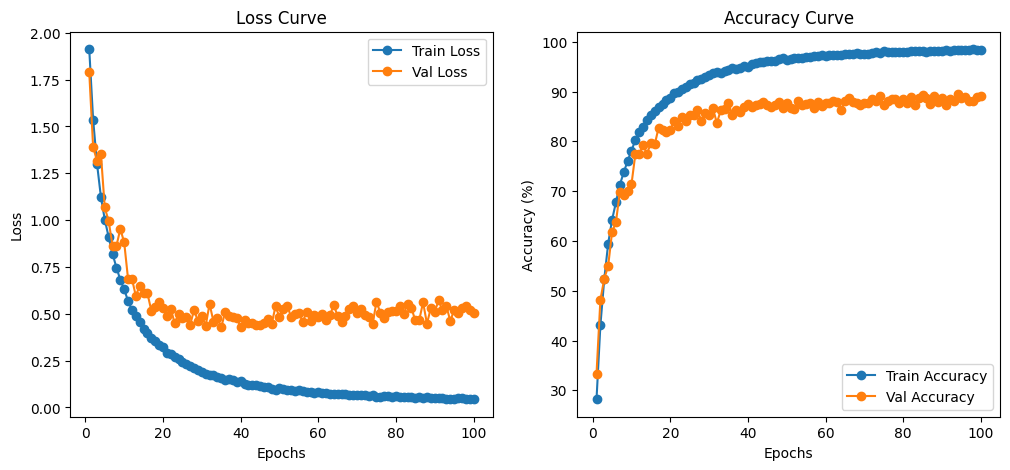

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary
# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.skip = None if in_channels == out_channels and stride == 1 else nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        identity = self.skip(x) if self.skip else x
        x = F.relu(self.bn1(self.conv1(x)))  # Fixed: Use F.relu()
        x = self.bn2(self.conv2(x)) + identity
        return F.relu(x)  # Fixed: Use F.relu()

# Custom ResNet
class CustomResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.init_conv = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.init_bn = nn.BatchNorm2d(64)

        self.layer1 = nn.Sequential(
            ResidualBlock(64, 64),
            ResidualBlock(64, 64)
        )
        self.layer2 = nn.Sequential(
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 128)
        )
        self.layer3 = nn.Sequential(
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 256)
        )

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, 10)  # CIFAR-10 has 10 classes

    def forward(self, x):
        x = F.relu(self.init_bn(self.init_conv(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

# Training function with loss/accuracy tracking
def train_model(model, train_loader, val_loader, device, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_acc)

        # Validation Phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_acc = 100 * correct / total
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] | "
              f"Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_acc:.2f}%")

    return train_losses, train_accuracies, val_losses, val_accuracies

# Plot training curves
def plot_results(train_losses, train_accuracies, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss", marker="o")
    plt.plot(epochs, val_losses, label="Val Loss", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy", marker="o")
    plt.plot(epochs, val_accuracies, label="Val Accuracy", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.show()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomResNet().to(device)

# Print summary with input size (3, 32, 32) for CIFAR-10
summary(model, (3, 32, 32))
train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, device, epochs=100)

# Plot results
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)


In [12]:
# Test Evaluation
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 90.99%


In [15]:
import pandas as pd
# Load test dataset
cifar_test_path = 'cifar_test_nolabel.pkl'
test_batch = load_cifar_batch(cifar_test_path)
test_images = test_batch[b'data'].astype(np.float32) / 255.0
mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]
composed_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Convert test dataset to Tensor
test_dataset = [(composed_test(img),) for img in test_images]
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        images = batch[0].to(device)  # Get images tensor from tuple and move to device
        outputs = model(images) 
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Generate submission file
submission = pd.DataFrame({'ID': np.arange(len(predictions)), 'Labels': predictions})
submission.to_csv('submission2.csv', index=False)
print("Submission2 file saved.")

Submission2 file saved.
